In [18]:
# Import required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
sns.set_style("whitegrid")

# import some additional packages
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn. preprocessing import StandardScaler

# DF

In [19]:
df =pd.read_csv("https://raw.githubusercontent.com/KrzysztofSzerenos/DMML2022_-Hublot/main/data/training_data.csv",) 
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [20]:
df2 =pd.read_csv("https://raw.githubusercontent.com/KrzysztofSzerenos/DMML2022_-Hublot/main/data/bert2.csv",)
df2.shape

(4800, 1)

In [21]:
df['bert'] = df2['bert']
df.tail(10)

,id,sentence,difficulty,bert
4790,4790,Merci pour cette histoire et bonne année !,A1,0.173168
4791,4791,La marche était cassée et je suis tombé par te...,B1,0.079947
4792,4792,Les villages situés à mi-côte sont cachés par ...,C1,-0.006260
4793,4793,La réduction du dioxyde de carbone par l'eau n...,B2,-0.000044
4794,4794,Elle connaissait à présent la petitesse des pa...,C1,0.013849
4795,4795,"C'est pourquoi, il décida de remplacer les hab...",B2,-0.028824
4796,4796,Il avait une de ces pâleurs splendides qui don...,C1,0.044852
4797,4797,"Et le premier samedi de chaque mois, venez ren...",A2,0.113623
4798,4798,Les coûts liés à la journalisation n'étant pas...,C2,-0.042015
4799,4799,"Sur le sable, la mer haletait de toute la resp...",C2,-0.049908


word_count and characters_count for the sentence

In [22]:
df['word_count'] = df['sentence'].apply(lambda n: len(n.split()))
df['characters_count'] = df['sentence'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df.head()

,id,sentence,difficulty,bert,word_count,characters_count
0,0,Les coûts kilométriques réels peuvent diverger...,C1,0.001702,38,218
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,0.215746,12,51
2,2,Le test de niveau en français est sur le site ...,A1,-0.019108,13,54
3,3,Est-ce que ton mari est aussi de Boston?,A1,0.051101,8,33
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,-0.006344,34,176


# LINEAR REGRESSION CV MODEL

In [23]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [24]:
df_test = pd.read_csv("https://raw.githubusercontent.com/KrzysztofSzerenos/DMML2022_-Hublot/main/data/unlabelled_test_data.csv",)
df_test = df_test['sentence']
X_kag_set = df_test

## Split in Train (80%) Test (10%)

In [25]:
X = df['sentence']
y = df['difficulty']
#X = df['sentence']
#y = df['difficulty']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)
np.unique(y, return_counts=True)

(array(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], dtype=object),
 array([813, 795, 795, 792, 798, 807]))

In [26]:
df.reset_index(drop=True, inplace=True)

##Vectorization (CountVectorizer)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()  # vectorization
vectorizer.fit(X,y)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_kag_set = vectorizer.transform(X_kag_set)

##Setting up the model and its parameters

In [28]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
classifier = LogisticRegressionCV()
classifier.fit(X_train_vec, y_train)
log_reg_pred = classifier.predict(X_test_vec)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

##Model evaluation with Confusion Matrix and all the required in project measures:

- Accuracy
- Precision
- Recall
- F1 score

ACCURACY SCORE:
0.4896
CLASSIFICATION REPORT:
	Precision: 0.4888
	Recall: 0.4896
	F1_Score: 0.4845
0.4896


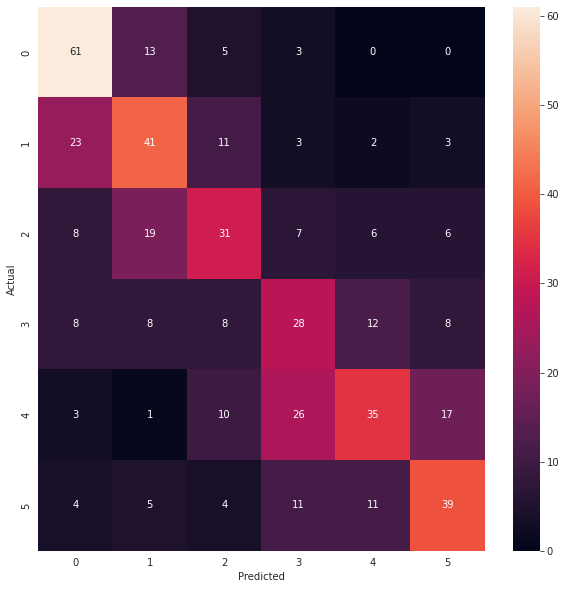

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def evaluate(test, pred):
  precision = precision_score(test, pred, average='weighted')
  recall = recall_score(test, pred, average='weighted')
  f1= f1_score(test, pred, average='weighted')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, log_reg_pred)
def accuracy_conf_mat(test, pred):
  print(round(accuracy_score(test, pred), 4))
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, log_reg_pred)